In [1]:
import numpy as np
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
from coffea import processor
import hist
import json
import awkward as ak
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = ak.from_json("data_ZToNuNu.json")
fl = "root://cmsxrootd.fnal.gov/"

In [3]:
sample = [ i for i in data ]
fname = [data[sample[i]][0] for i in range(len(sample))]

In [4]:
sample

['ZJetsToNuNu_HT-100To200',
 'ZJetsToNuNu_HT-1200To2500',
 'ZJetsToNuNu_HT-200To400',
 'ZJetsToNuNu_HT-2500ToInf',
 'ZJetsToNuNu_HT-400To600',
 'ZJetsToNuNu_HT-600To800',
 'ZJetsToNuNu_HT-800To1200']

In [5]:
xsecs = {
    "ZJetsToNuNu_HT-100To200": 267,
    "ZJetsToNuNu_HT-200To400": 73.08,
    "ZJetsToNuNu_HT-400To600": 13.21,
    "ZJetsToNuNu_HT-600To800": 2.413,
    "ZJetsToNuNu_HT-800To1200": 1.071,
    "ZJetsToNuNu_HT-1200To2500": 0.2497,
    "ZJetsToNuNu_HT-2500ToInf": 0.005618
}

luminosity = {
    "2016": 36330.0,
    "2017": 41480.0,
    "2018": 59830.0
}

In [6]:
def histogram(sample):
    '''
    Para Descargar la data
    '''
    hT = []
    for i in range(len(data[sample])):
        print("{}. Muestra numero {} del dataset {}:".format(i+1,i+1,sample))
        h = hist.Hist(hist.axis.Regular(40,0,400,name='met',label='$p_T^{miss}$ [GeV]'))
        fname = data[sample][i]
        event_temp = NanoEventsFactory.from_root("root://cmsxrootd.fnal.gov/"+fname,schemaclass=NanoAODSchema).events()
        print(f"Number of events before the cuts: {len(event_temp)}")

        good_met = event_temp.MET.pt > 50 ## ?

        print(f"Number of events after the cuts: {ak.sum(good_met)}")
        met = event_temp.MET[good_met]

        #sumgenweight = ak.sum(event_temp.genWeight)
        #sumgenweights = {sample:sumgenweight}
        
        h.fill(met = met.pt)
        hT.append(h)
    return hT

def scaleAH(his_out,sample):
    '''
    Para acumular histogramas
    '''
    weight = (xsecs[sample]* luminosity["2017"])# / his_out[1][sample]
    acumm = processor.accumulate(his_out)
    h = acumm*weight
    
    with open("histograms_data/{}.pkl".format(sample), "wb") as f:
        pickle.dump(h, f)
    
    return h

def scaleAH_add(his_out,sample,sample_add):
    '''
    Para separar por secciones en las muestras.
    '''
    weight = (xsecs[sample]* luminosity["2017"])# / his_out[1][sample_add]
    acumm = processor.accumulate(his_out)
    h = acumm*weight
    
    with open("histograms_data/{}.pkl".format(sample_add), "wb") as f:
        pickle.dump(h, f)
    
    return h

def read(h:str):
    '''
    Lee la data del hisgrama guadado en formato pickel en la carpeta histograms_data
    '''
    with open('histograms_data/{}.pkl'.format(h), 'rb') as f:
        x = pickle.load(f)
    return x

-----------------------
## Obtencion de la Data

In [ ]:
out0 = histogram(sample[0])
h0 = scaleAH(out0,sample[0])

In [ ]:
out1 = histogram(sample[1])
h1 = scaleAH(out1,sample[1])

In [ ]:
out2 = histogram(sample[2])
h2 = scaleAH(out2,sample[2])

In [ ]:
put2 = histogram(sample[4])
put22 = histogram(sample[5])
put23 = histogram(sample[6])

h2_1 = scaleAH_add(out2,"ZJetsToNuNu_HT-200To400",sample[2])
h2_2 = scaleAH_add(out22,"ZJetsToNuNu_HT-200To400",sample[3])
h2_3 = scaleAH_add(out23,"ZJetsToNuNu_HT-200To400",sample[4])

h21 = read(sample[2])
h22 = read(sample[3])
h23 = read(sample[4])

h2 = processor.accumulate([h21,h22,h23])
with open("histograms_data/{}.pkl".format("ZJetsToNuNu_HT-200To400"), "wb") as f:
        pickle.dump(h2, f)

In [ ]:
out3 = histogram(sample[3])
h3 = scaleAH(out3,sample[3])

In [ ]:
out4 = histogram(sample[4])
h4 = scaleAH(out4,sample[4])

In [ ]:
out5 = histogram(sample[5])
h5 = scaleAH(out5,sample[5])

In [ ]:
out6 = histogram(sample[6])
h6 = scaleAH(out6,sample[6])

---------------------
## Analisis de histogramas

In [7]:
h0 = read(sample[0])
h1 = read(sample[1])
h2 = read(sample[2])
h3 = read(sample[3])
h4 = read(sample[4])
h5 = read(sample[5])
h6 = read(sample[6])

In [8]:
histos = {
    "dataset0": h0, #ZJetsToNuNu_HT-100To200
    "dataset1": h1, #ZJetsToNuNu_HT-1200To2500
    "dataset2": h2, #ZJetsToNuNu_HT-200To400
    "dataset3": h3, #ZJetsToNuNu_HT-2500ToInf
    "dataset4": h4, #ZJetsToNuNu_HT-400To600
    "dataset5": h5, #ZJetsToNuNu_HT-600To800
    "dataset6": h6 #"ZJetsToNuNu_HT-800To1200"
}

In [9]:
import matplotlib.pyplot as plt

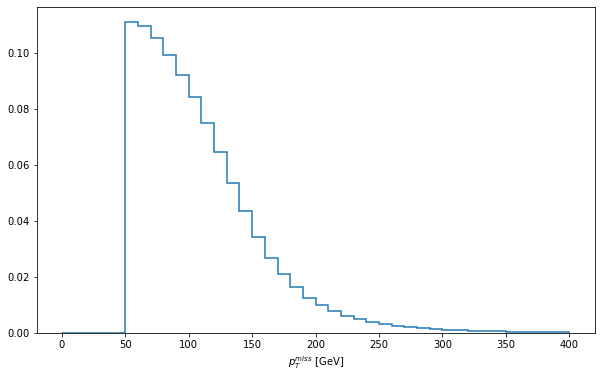

In [10]:
plt.figure(figsize=(10,6))
h = processor.accumulate(histos.values()).plot1d(density=True)

with open("histograms_data/{}.pkl".format("histos"), "wb") as f:
        pickle.dump(h, f)

dataset0 : ZJetsToNuNu_HT-100To200
dataset1 : ZJetsToNuNu_HT-1200To2500
dataset2 : ZJetsToNuNu_HT-200To400
dataset3 : ZJetsToNuNu_HT-2500ToInf
dataset4 : ZJetsToNuNu_HT-400To600
dataset5 : ZJetsToNuNu_HT-600To800
dataset6 : ZJetsToNuNu_HT-800To1200


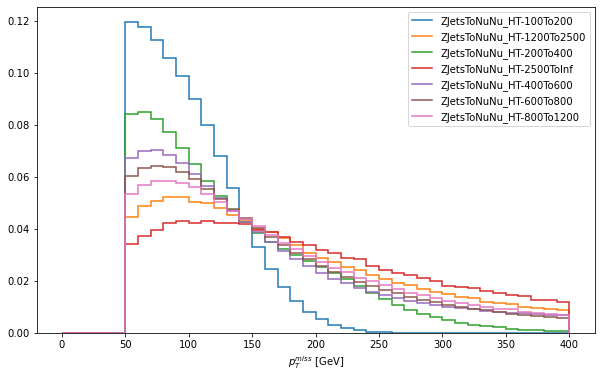

In [11]:
plt.figure(figsize=(10,6))
for i,j in enumerate(histos):
    print(j,":",sample[i])
    histos[f"{j}"].plot1d(density=True)
plt.legend(sample)
plt.show()